<a href="https://colab.research.google.com/github/Alexabrego2011/Grupo901Github/blob/master/Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import csv


In [2]:
data = pd.read_csv('/content/Datos.csv',  header = None)

In [3]:
data.columns = ['','ENGINESIZE','CYLENDERS','FUELCONSUMPTION_COMB','CO2EMISSION']

In [4]:
data.describe()

,,ENGINESIZE,CYLENDERS,FUELCONSUMPTION_COMB,CO2EMISSION
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,2.970000,5.200000,9.770000,203.600000
std,3.02765,0.812472,1.032796,1.655999,80.844432
min,0.00000,1.500000,4.000000,5.900000,0.000000
25%,2.25000,2.400000,4.000000,9.300000,202.250000
50%,4.50000,3.500000,6.000000,10.050000,231.000000
75%,6.75000,3.500000,6.000000,10.975000,252.250000
max,9.00000,3.700000,6.000000,11.600000,267.000000


In [5]:
data.head(9)

,,ENGINESIZE,CYLENDERS,FUELCONSUMPTION_COMB,CO2EMISSION
0,0,2.0,4,8.5,196
1,1,2.4,4,9.6,221
2,2,1.5,4,5.9,136
3,3,3.5,6,11.1,255
4,4,3.5,6,10.6,244
5,5,3.5,6,10.0,230
6,6,3.5,6,10.1,232
7,7,3.7,6,11.1,255
8,8,3.7,6,11.6,267


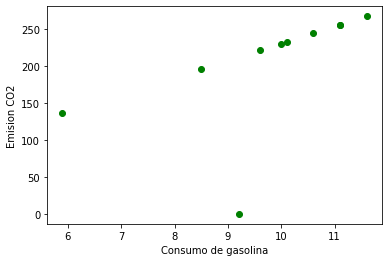

In [6]:
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSION,  color='green')
plt.xlabel("Consumo de gasolina")
plt.ylabel("Emision CO2")
plt.show()

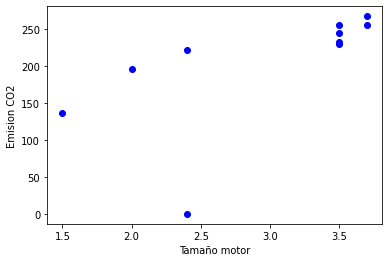

In [7]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSION, color='blue')
plt.xlabel("Tamaño motor")
plt.ylabel("Emision CO2")
plt.show()

In [8]:
msk = np.random.rand(len(data)) < 0.8
entreno = data[msk]
test = data[~msk]

<function matplotlib.pyplot.show>

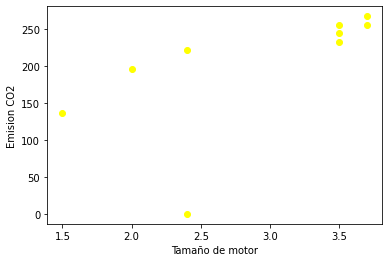

In [9]:
plt.scatter(entreno.ENGINESIZE, entreno.CO2EMISSION, color='yellow')
plt.xlabel("Tamaño de motor")
plt.ylabel("Emision CO2")
plt.show

In [10]:
from sklearn import linear_model

In [11]:
regr = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['ENGINESIZE']])
entre_y = np.asanyarray(entreno[['CO2EMISSION']])
regr.fit(entre_x,entre_y)

LinearRegression()

In [12]:
print('Coeficientes: ', regr.coef_)
print('Interseccion: ', regr.intercept_)

Coeficientes:  [[63.74851954]]
Interseccion:  [15.08764311]


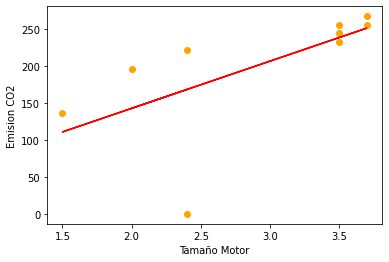

In [13]:
plt.scatter(entreno.ENGINESIZE, entreno.CO2EMISSION,  color='orange')
plt.plot(entre_x, regr.coef_[0] [0]*entre_x + regr.intercept_[0], '-r' )
plt.xlabel("Tamaño Motor")
plt.ylabel("Emision CO2")
plt.show()

In [14]:
from sklearn.metrics import r2_score

In [15]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSION']])
testeo = regr.predict(test_x)

In [16]:
print("Error Cuadratico: %.2f" % np.mean(np.absolute(testeo - test_y)))
print("Suma de Cuadrados Resisual: %.2f" % np.mean((testeo - test_y) ** 2))
print("R2: %.2f" % r2_score(test_y, testeo) )

Error Cuadratico: 8.21
Suma de Cuadrados Resisual: 67.36
R2: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
